# Elementary Genetic Algorithm

### What is Genetic Algorithm?
> Genetic algorithms (GAs) are stochastic search algorithms inspired by the basic principles of biological evolution and natural selection. GAs simulates the evolution of living organisms, where the fittest individuals dominate over the weaker ones, by mimicking the biological mechanism of evolution, such as *selection*, *crossover*, and *mutation*

It is applicable in a search/optimization problems.

We consider a set of solutions for a given problem and select the set with the best value.

Typically GA has five steps:
1. **Initial population:**
   - process begins with a set of individuals called **population** that represent a potential solution to a given problem
   - each individual is characterized by a set of parameters (variables) known as **Genes** each parameter(genes) are joined into a string to form a **Chromosome** representing a solution.
2. **Fitness function:**
   - function that determines the how fit an individual is among other individuals in the population.
   - **fitness score** is assigned to each individual
3. **Selection:**
   - the fitness score determines the probability that an individual will be selected for reproduction
   - pair of individuals (**parents**) are selected based on their fitness scores
4. **Crossover:**
   - critical part of GA
   - for each pair of individuals (parents) that is chosen to reproduce, a **crossover point** is randomly chosen from within the genes
<center><img src="../assets/images/cross_over.png" alt="Drawing" width="400"/> </center>
   - **Offspring** are created by exchanging the genes of parents among themselves until the crossover point is reached
<center><img src="../assets/images/new_offspring.png" alt="Drawing" width="400"/> </center>
   - The new offspring are then added to the population
5. **Mutation:**
   - When new offspring are reproduced, their genes can be mutated with a low random probability. In this context, this implies some of the bits in the Chromosome string can be flipped.
<center><img src="../assets/images/mutated_offspring.png" alt="Drawing" width="400"/> </center>

**How does the algorithm terminate?**
* The algorithm terminates if the population has converged which means that the new generation of offspring does not result in significantly different result than the previous generation.
* When convergence happen GA has found a set of solution to the problem.

**General Psuedocode:**

```
START
Generate the initial population
Compute fitness
REPEAT
    Selection
    Crossover
    Mutation
    Compute fitness
UNTIL population has converged
STOP
```

## Genetic Algorithm for numeric optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _fitness(x):
    if x > -11 and  x < 11:
        y = (x**2 + x)*np.cos(2*x) + x**2
        return round(y,0)
    else:
        return 0

fitness = np.vectorize(_fitness)

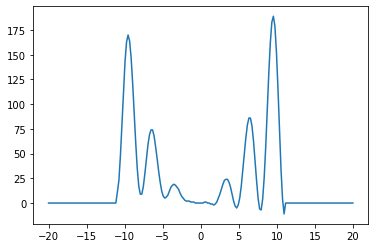

In [3]:
x = np.linspace(start=-20, stop=20, num=200)   # popluation 
plt.plot(x, fitness(x));

### GA Optimization for this specific example numerical problem

Given a fitness function,  
$$ (x) = (x^2 + x) \times cos(2x) + x^2 $$
we are trying to maximize the value of $h(x)$ under the constraint of $N$ generations.

**Algorithm outline:**
1. Initialize `parent` by creating an array of uniformly distributed values over the domain of $h(x)$
2. Calculate the fitness of all individuals in the population
    - Keep track of all the fitness score of individual(s) throughout all generations
3. Sample the `parents` pair with sampling weights based on fitness 
    - i.e. those with greater fitness have greater likelihood of being resampled
    - these will be used to create `children` for the next generation
    - with some `mutation rate` mutate the parents
    - with some `crossover rate` select pairs of parents and randomly combine characteristic (bit swapping)
4. Population from steps 3 become the children from the previous generation. Repeat steps 2-4

Here,
- we will have 1 attribute (chromosome) for each individual.
- In `mutation` step we'll generate $\epsilon$ from some symmetrical distribution (either uniform or normal). Then for every unit in the current population we will add or subtract $\epsilon$.
- we will not `crossover` in this example.

In [4]:
def mutate(parents, fitness_function):
    n = int(len(parents))
    scores = fitness_function(parents)
    idx = scores > 0 ## only get positive values
    scores = scores[idx]
    parents = np.array(parents)[idx]

    
    # add some noise for mutation
    children = np.random.choice(parents, size=n, p = scores/scores.sum())
    children = children + np.random.uniform(-0.51, 0.51, size=n)
    
    return children.tolist()

In [5]:
def GA(parents, fitness_function, popsize=100, max_iter=100):
    History = []
    
    # initial parents, generation 0
    best_parents, best_fitness = _get_fittest_parent(parents, fitness)
    print(f"generation 0 | best fitness {best_fitness} | current fitness {best_fitness} | current parent {best_parents}")
    
    # plot initial parents
    x = np.linspace(start=-20, stop=20, num=140)
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker='x')
    
    # for each next generation
    for i in range(1, max_iter):
        parents = mutate(parents, fitness_function = fitness_function)
        
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)  # get the fittest individuals
        
        # update best fitness values
        if curr_fitness > best_fitness:
            best_fitness = curr_fitness
            best_parent = curr_parent
        
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
        
        if i % 10 == 0:
            print(f"generation {i} | best fitness {best_fitness} | current fitness {curr_fitness} | current parent {curr_parent}")
        
        History.append((i, np.max(fitness_function(parents))))
    
    plt.scatter(parents, fitness_function(parents))
    plt.scatter(best_parent, fitness_function(best_parent), marker=".", c="r", s=200)
    plt.pause(0.09)
    plt.ioff()
    
    # return best parent
    print(f"generation {i} | best fitness {best_fitness} |best parent {best_parent}")
    
    return best_parent, best_fitness, History

In [6]:
def _get_fittest_parent(parents, fitness):
    _fitness = fitness(parents)
    PFitness = list(zip(parents, _fitness))
    PFitness.sort(key = lambda x:x[1], reverse=True)
    best_parent, best_fitness = PFitness[0]
    return round(best_parent, 4), round(best_fitness, 4)

In [7]:
x = np.linspace(start=-20, stop=20, num=200)
init_pop = np.random.uniform(low = -20, high = 20, size=100)

generation 0 | best fitness 185 | current fitness 185 | current parent 9.6574
generation 10 | best fitness 189.0 | current fitness 189.0 | current parent 9.5423
generation 20 | best fitness 189.0 | current fitness 189.0 | current parent 9.4889
generation 30 | best fitness 189.0 | current fitness 189.0 | current parent 9.5181
generation 40 | best fitness 189.0 | current fitness 189.0 | current parent 9.514
generation 50 | best fitness 189.0 | current fitness 189.0 | current parent 9.5276
generation 60 | best fitness 189.0 | current fitness 189.0 | current parent 9.563
generation 70 | best fitness 189.0 | current fitness 189.0 | current parent 9.5387
generation 80 | best fitness 189.0 | current fitness 189.0 | current parent 9.4961
generation 90 | best fitness 189.0 | current fitness 189.0 | current parent 9.4905


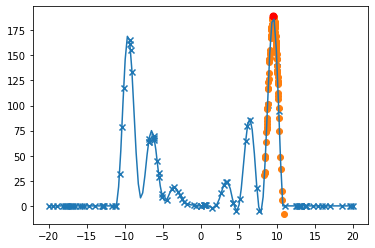

generation 99 | best fitness 189.0 |best parent 9.5564
top parent 9.5564, top fitness 189.0


In [8]:
parent_, fitness_, history_ = GA(init_pop, fitness)
print(f"top parent {parent_}, top fitness {fitness_}")